In [1]:
import pandas as pd
import numpy as np
import torch

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

from sklearn.metrics import precision_recall_fscore_support


import spacy
from spacy.matcher import Matcher
nlp = spacy.load("en_core_web_sm")

/home/simret/miniconda3/envs/py39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
df = pd.read_csv("res.csv")
cols = ['$ORG|NUM+*+NOUN', '$ORG|PROPN+*']
outs = df["labels"].values
smaller_inputs =  df[cols].values

ins = torch.tensor(smaller_inputs)

output = torch.tensor(outs).reshape(-1,1)


net = torch.nn.Linear(ins.shape[1],1, bias=False)
softmax = torch.nn.Softmax()

sigmoid = torch.nn.Sigmoid()

criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=.04)
losses = []
net.train()

for e in range(500):
    optimizer.zero_grad()
    o =  sigmoid.forward(net.forward(ins.float()))
    loss = criterion(o, output.float())
    losses.append(loss.abs().sum().item())
    loss.backward()
    
    optimizer.step()

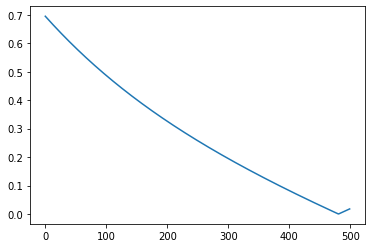

In [13]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

In [14]:
pred =  sigmoid.forward(net.forward(ins.float()))

In [15]:
pred, output

(tensor([[0.9274],
         [0.4606],
         [0.4606],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.0627],
         [0.5000],
         [0.0627]], grad_fn=<SigmoidBackward0>),
 tensor([[ 1],
         [ 1],
         [ 1],
         [-1],
         [-1],
         [-1],
         [-1],
         [-1],
         [-1],
         [-1]]))

In [35]:
net.weight

Parameter containing:
tensor([[ 0.8192, -1.2871]], requires_grad=True)

In [7]:
ins

tensor([[1, 0],
        [1, 1],
        [1, 1],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 1],
        [0, 0],
        [0, 1]])